In [61]:
from pylab import *
%run "Integradores.ipynb" #notebook a notebook
%matplotlib inline

Se rerolvera la siguiente ecuación diferencal:
$$\frac{d^2 \vec{\rho}}{d\tau ^2} =- \frac{\hat{\rho}}{\rho^2}$$

In [62]:
def mov_planeta(x,t):
    r3=(x[0]**2+x[1]**2)**(1.5)
    drx=x[2]
    dry=x[3]
    dvrx=-x[0]/r3
    dvry=-x[1]/r3
    return array([drx,dry,dvrx,dvry])
def J_mov_planeta(x,t):
    d_ec=array([0,0,0,0])
    r5=(x[0]**2+x[1]**2)**(2.5)
    rxmry=(2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx=(2*x[1]*x[1]-x[0]*x[0])/r5
    rxry=(3*x[0]*x[1])/r5
    Jac=array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac
    

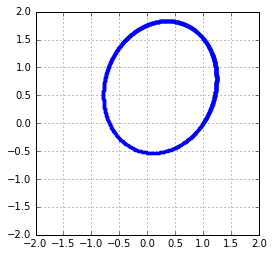

CPU times: user 457 ms, sys: 13.4 ms, total: 471 ms
Wall time: 484 ms


In [67]:
%%time
t,r_vr=rk2(mov_planeta,[1,0,0.6,0.9],[0,10],0.01)#con tiempo de 0 a 2, regresa tiempos y soluciones en forma matricial
#mov_planeta,[1,0,velocidades,velocidades], programa usando Runge Kutta
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()


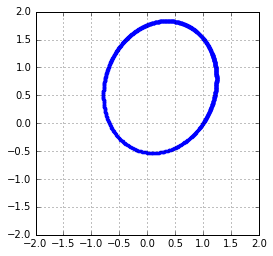

CPU times: user 401 ms, sys: 8.12 ms, total: 409 ms
Wall time: 426 ms


In [68]:
%%time
t,r_vr=integra2(mov_planeta,J_mov_planeta, [1,0,0.6,0.9],[0,10],0.01)#con tiempo de 0 a 2, regresa tiempos y soluciones en forma matricial
#mov_planeta,[1,0,velocidades,velocidades], programa usando integra2
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()



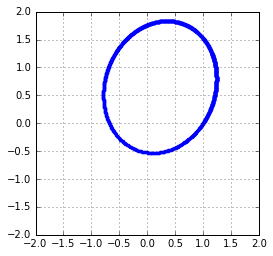

CPU times: user 422 ms, sys: 6.39 ms, total: 428 ms
Wall time: 446 ms


In [69]:
%%time
t,r_vr=rk4(mov_planeta,[1,0,0.6,0.9],[0,10],0.01)#con tiempo de 0 a 2, regresa tiempos y soluciones en forma matricial
#mov_planeta,[1,0,velocidades,velocidades], programa usando Runge Kutta
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [70]:
from scipy.integrate import *

In [71]:
h=0.1
tiempos=arange(0,10+h,h)

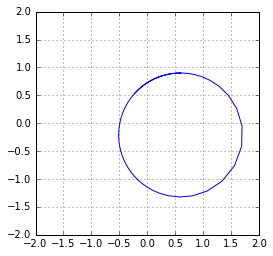

CPU times: user 347 ms, sys: 6.62 ms, total: 354 ms
Wall time: 380 ms


In [76]:

%%time
r_vr=odeint(mov_planeta,[1,0,0.6,0.9],tiempos)
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,2],r_vr[:,3])
show()